In [1]:
%%capture
!pip install pandas seaborn requests matplotlib

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [3]:
# Get tables from url
path = "./data/aminoacids_properties_sigmaaldrich.html"
url = "https://www.sigmaaldrich.com/life-science/metabolomics/learning-center/amino-acid-reference-chart.html"
if not os.path.isfile(path):
    with open(path, "w") as file:
        file.write(requests.get(url).text)
tables = pd.read_html(path, header=0)
# Get first table and remove last comment line
aminoacids = tables[0].copy()[:-1]
# Fix table header
aminoacids.columns = [c.replace(' ', '') for c in aminoacids.columns]
aminoacids = aminoacids.rename(mapper={"ResidueWeight(-H2O)": "ResidueWeight", "Abbr..1": "Sym"}, axis=1)
aminoacids.set_index("Abbr.", inplace=True)
aminoacids.drop(["MolecularFormula", "ResidueFormula", "MolecularWeight"], axis=1, inplace=True)
aminoacids

,Name,Sym,ResidueWeight,pKa1,pKb2,pKx3,pl4
Abbr.,,,,,,,
Ala,Alanine,A,71.08,2.34,9.69,–,6.00
Arg,Arginine,R,156.19,2.17,9.04,12.48,10.76
Asn,Asparagine,N,114.11,2.02,8.80,–,5.41
Asp,Aspartic acid,D,115.09,1.88,9.60,3.65,2.77
Cys,Cysteine,C,103.15,1.96,10.28,8.18,5.07
Glu,Glutamic acid,E,129.12,2.19,9.67,4.25,3.22
Gln,Glutamine,Q,128.13,2.17,9.13,–,5.65
Gly,Glycine,G,57.05,2.34,9.60,–,5.97
His,Histidine,H,137.14,1.82,9.17,6.00,7.59


In [4]:
# Get tables from url
path = "./data/aminoacids_properties_wikipedia.html"
url = "https://en.wikipedia.org/wiki/Amino_acid"
if not os.path.isfile(path):
    with open(path, "w") as file:
        file.write(requests.get(url).text)
tables = pd.read_html(path, header=0)
# Get table and remove comment line
class_polarity = tables[1].copy()
# Fix table header
class_polarity.columns = class_polarity.iloc[0]
class_polarity = class_polarity.iloc[1:, 1:7]
class_polarity.columns = ["Abbr.", "Sym", "Class", "Polarity", "Charge", "Hydropathy"]
class_polarity.drop("Sym", axis=1, inplace=True)
class_polarity.set_index("Abbr.", inplace=True)
class_polarity

,Class,Polarity,Charge,Hydropathy
Abbr.,,,,
Ala,Aliphatic,Nonpolar,Neutral,1.8
Arg,Basic,Basic polar,Positive,−4.5
Asn,Amide,Polar,Neutral,−3.5
Asp,Acid,Acidic polar,Negative,−3.5
Cys,Sulfuric,Nonpolar,Neutral,2.5
Gln,Amide,Polar,Neutral,−3.5
Glu,Acid,Acidic polar,Negative,−3.5
Gly,Aliphatic,Nonpolar,Neutral,−0.4
His,Basic aromatic,Basic polar,"Positive, 10%Neutral, 90%",−3.2


In [5]:
# Fix value from Lehninger
class_polarity.loc["His", "Charge"] = "Positive"
# Fix minus sign
class_polarity["Hydropathy"] = class_polarity["Hydropathy"].apply(
    lambda x: x if x[0].isnumeric() else "-" + x[1:]
)
class_polarity

,Class,Polarity,Charge,Hydropathy
Abbr.,,,,
Ala,Aliphatic,Nonpolar,Neutral,1.8
Arg,Basic,Basic polar,Positive,-4.5
Asn,Amide,Polar,Neutral,-3.5
Asp,Acid,Acidic polar,Negative,-3.5
Cys,Sulfuric,Nonpolar,Neutral,2.5
Gln,Amide,Polar,Neutral,-3.5
Glu,Acid,Acidic polar,Negative,-3.5
Gly,Aliphatic,Nonpolar,Neutral,-0.4
His,Basic aromatic,Basic polar,Positive,-3.2


In [6]:
# From "Generation and evaluation of dimension-reduced..." (Meiler, 2001)
meiler = pd.read_csv("./data/meiler2001.txt", sep=" ")
meiler = meiler.iloc[:, :-1]
meiler["Abbr."] = meiler["Abbr."].apply(lambda x: x[0] + x[1:].lower())
meiler.set_index("Abbr.", inplace=True)
meiler

,Steric,Polar,Volume,Hydoph,IsoPoint,HelixProb,SheetProb
Abbr.,,,,,,,
Ala,1.28,0.05,1.00,0.31,6.11,0.42,0.23
Gly,0.00,0.00,0.00,0.00,6.07,0.13,0.15
Val,3.67,0.14,3.00,1.22,6.02,0.27,0.49
Leu,2.59,0.19,4.00,1.70,6.04,0.39,0.31
Ile,4.19,0.19,4.00,1.80,6.04,0.30,0.45
Phe,2.94,0.29,5.89,1.79,5.67,0.30,0.38
Tyr,2.94,0.30,6.47,0.96,5.66,0.25,0.41
Trp,3.21,0.41,8.08,2.25,5.94,0.32,0.42
Thr,3.03,0.11,2.60,0.26,5.60,0.21,0.36


In [7]:
aminoacids = pd.concat([
    aminoacids.iloc[:, :2],
    class_polarity,
    meiler[["HelixProb", "SheetProb"]],
    aminoacids.iloc[:, 2:]
], axis=1)

In [8]:
# Fix columns types
numerics = ["ResidueWeight", "pKa1", "pKb2", "pKx3", "pl4", "Hydropathy"]
# Apply column-wise casting and map missing to zero
aminoacids[numerics] = aminoacids[numerics].applymap(lambda x: pd.to_numeric(x, errors="coerce")).fillna(0)
aminoacids

,Name,Sym,Class,Polarity,Charge,Hydropathy,HelixProb,SheetProb,ResidueWeight,pKa1,pKb2,pKx3,pl4
Abbr.,,,,,,,,,,,,,
Ala,Alanine,A,Aliphatic,Nonpolar,Neutral,1.8,0.42,0.23,71.08,2.34,9.69,0.00,6.00
Arg,Arginine,R,Basic,Basic polar,Positive,-4.5,0.36,0.25,156.19,2.17,9.04,12.48,10.76
Asn,Asparagine,N,Amide,Polar,Neutral,-3.5,0.21,0.22,114.11,2.02,8.80,0.00,5.41
Asp,Aspartic acid,D,Acid,Acidic polar,Negative,-3.5,0.25,0.20,115.09,1.88,9.60,3.65,2.77
Cys,Cysteine,C,Sulfuric,Nonpolar,Neutral,2.5,0.17,0.41,103.15,1.96,10.28,8.18,5.07
Glu,Glutamic acid,E,Acid,Acidic polar,Negative,-3.5,0.42,0.21,129.12,2.19,9.67,4.25,3.22
Gln,Glutamine,Q,Amide,Polar,Neutral,-3.5,0.36,0.25,128.13,2.17,9.13,0.00,5.65
Gly,Glycine,G,Aliphatic,Nonpolar,Neutral,-0.4,0.13,0.15,57.05,2.34,9.60,0.00,5.97
His,Histidine,H,Basic aromatic,Basic polar,Positive,-3.2,0.27,0.30,137.14,1.82,9.17,6.00,7.59


In [9]:
aminoacids.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Ala to Val
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           22 non-null     object 
 1   Sym            22 non-null     object 
 2   Class          20 non-null     object 
 3   Polarity       20 non-null     object 
 4   Charge         20 non-null     object 
 5   Hydropathy     22 non-null     float64
 6   HelixProb      20 non-null     float64
 7   SheetProb      20 non-null     float64
 8   ResidueWeight  22 non-null     float64
 9   pKa1           22 non-null     float64
 10  pKb2           22 non-null     float64
 11  pKx3           22 non-null     float64
 12  pl4            22 non-null     float64
dtypes: float64(8), object(5)
memory usage: 2.4+ KB


In [10]:
aminoacids.describe()

,Hydropathy,HelixProb,SheetProb,ResidueWeight,pKa1,pKb2,pKx3,pl4
count,22.000000,20.000000,20.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,-0.445455,0.283000,0.312500,118.726364,2.061818,9.004091,2.507273,5.735000
std,2.844833,0.089801,0.093012,29.389193,0.516616,2.055394,4.163517,2.116252
min,-4.500000,0.130000,0.150000,57.050000,0.000000,0.000000,0.000000,0.000000
25%,-3.425000,0.210000,0.245000,101.620000,1.967500,9.115000,0.000000,5.510000
50%,-0.750000,0.285000,0.305000,114.600000,2.175000,9.300000,0.000000,5.710000
75%,1.875000,0.360000,0.387500,130.680000,2.310000,9.615000,4.100000,5.995000
max,4.500000,0.420000,0.490000,186.220000,2.830000,10.600000,12.480000,10.760000


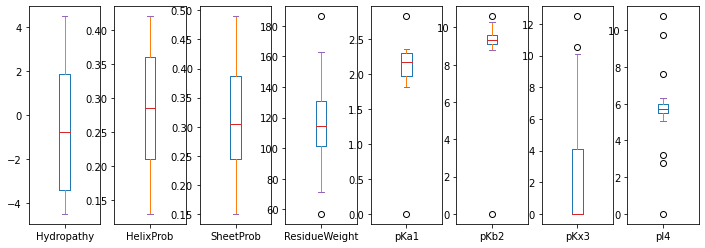

In [11]:
color = {
    "boxes": sns.color_palette("tab10")[0],
    "whiskers": sns.color_palette("tab10")[1],
    "medians": sns.color_palette("tab10")[3],
    "caps": sns.color_palette("tab10")[4],
}
column = list(aminoacids)[5:]
colors = sns.color_palette("tab10")[1:(len(column)+1)]
palette = dict(zip(column, colors)) 

_ = aminoacids.plot(kind = 'box', subplots=True, figsize=(12, 4), color=color)
#_, ax = plt.subplots(figsize=(12, 4))
#plot = sns.boxplot(data = aminoacids, ax=ax, palette=palette)
#plot.set_yscale("log")
#plt.ylim(min(log(aminoacids)), max(log(aminoacids)))

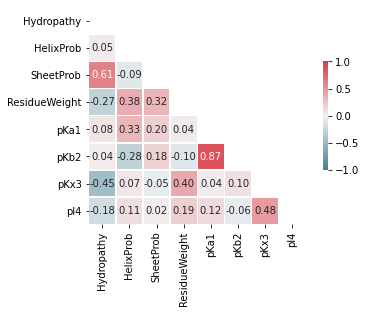

In [12]:
corr = aminoacids.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmin=-1,
    vmax=+1,
    center=0,
    square=True, 
    linewidths=.5,
    annot=True,
    fmt=".2f",
    cbar_kws={"shrink": .5}
)

In [13]:
aminoacids.to_csv("./data/aminoacids_properties.csv")